In [13]:
import os
import sys
sys.path.append("/mofem_install/spack/opt/spack/linux-ubuntu20.04-x86_64/gcc-9.4.0/tfel-4.0.0-jjcwdu6cbil5dzqzjhjekn3jdzo3e6gc/lib/python3.11/site-packages")
import numpy as np
import mtest
from scipy.spatial.transform import Rotation as R

m = mtest.MTest()
mtest.setVerboseMode(mtest.VerboseLevel.VERBOSE_QUIET)
m.setMaximumNumberOfSubSteps(20)
m.setModellingHypothesis("Tridimensional")

# model = "VonMisesHardening"
model = "VMSimo"
# model = "VonMisesIsotropicLinearHardening"


# Set  material model implementation and path
lib_path = "/mofem_install/jupyter/thomas/mfront_interface/src/libBehaviour.so"

b = mtest.Behaviour('generic', lib_path, model,'Tridimensional')
# print(b.getDrivingVariablesComponents())
print(f"Material Properties:{b.getMaterialPropertiesNames()}")
print(f"State variables:{b.getInternalStateVariablesNames()}")
m.setBehaviour("generic", lib_path, model)
E = 150
nu = 0.3
H = 10
# material has a uniaxial yield stress of sig_y
sig_y = 50
tau_oct_0 = np.sqrt(2/3) * sig_y
# Loading programme
tMax = 1.0  # s , total time
nTime = 2000
ltime = np.linspace(0.0, tMax, nTime)

# Environment parameters
m.setExternalStateVariable("Temperature", 293.15)

# Material parameters
m.setMaterialProperty("YoungModulus", E)
m.setMaterialProperty("PoissonRatio", nu)
m.setMaterialProperty("HardeningSlope", H)
m.setMaterialProperty("YieldStrength", sig_y)

controls = ["stress", "strain"]
control = controls[0]
if control == "stress":
    p_con_0 =  0 # confining pressure
    p_con_1 =  0 # confining pressure
    p_axi_0 = 0
    p_axi_1 = 190
    m.setImposedStress("SXX", {0: p_con_0, 0.02: p_con_0, 1.0: p_con_1})
    m.setImposedStress("SYY", {0: p_con_0, 0.02: p_con_0, 1.0: p_con_1})
    m.setImposedStress("SZZ", {0: p_axi_0, 0.02: p_axi_0, 1.0: p_axi_1})
if control == "strain":
    # Set imposed strains for axial and confining directions
    m.setImposedStrain("EXX", {0: 0, 1.0: 0.00001})
    m.setImposedStrain("EYY", {0: 0, 1.0: 0.00001})
    m.setImposedStrain("EZZ", {0: 0, 1.0: 0.7})


s = mtest.MTestCurrentState()
wk = mtest.MTestWorkSpace()
m.completeInitialisation()
m.initializeCurrentState(s)
m.initializeWorkSpace(wk)

# initialize output lists
sig_xx = []
sig_yy = []
sig_zz = []
sig_xy = []
sig_xz = []
sig_yz = []
sig_e_eq_trial = []
e_xx = []
e_yy = []
e_zz = []
e_xy = []
e_xz = []
e_yz = []


e_e_xx = []
e_e_yy = []
e_e_zz = []
e_e_xy = []
e_e_xz = []
e_e_yz = []
extracting_pl = True
if extracting_pl:
    e_p_xx = []
    e_p_yy = []
    e_p_zz = []
    e_p_xy = []
    e_p_xz = []
    e_p_yz = []
e_p_eq = []
# run sim
for i in range(nTime - 1):
    # print(f"===========Loop {i}===========")
    m.execute(s, wk, ltime[i], ltime[i + 1])
    sig_xx.append(s.s1[0])
    sig_yy.append(s.s1[1])
    sig_zz.append(s.s1[2])
    sig_xy.append(s.s1[3])
    sig_xz.append(s.s1[4])
    sig_yz.append(s.s1[5])
    eel = s.getInternalStateVariableValue("ElasticStrain")
    if extracting_pl:
        epl = s.getInternalStateVariableValue("PlasticStrain")
    epleq = s.getInternalStateVariableValue("EquivalentPlasticStrain")
    
    sig_e_eq_trial.append(s.getInternalStateVariableValue("TrialEquivalentStress"))
    
    e_xx.append(s.e1[0])
    e_yy.append(s.e1[1])
    e_zz.append(s.e1[2])
    e_xy.append(s.e1[3])
    e_xz.append(s.e1[4])
    e_yz.append(s.e1[5])

    e_e_xx.append(eel[0])
    e_e_yy.append(eel[1])
    e_e_zz.append(eel[2])
    e_e_xy.append(eel[3])
    e_e_xz.append(eel[4])
    e_e_yz.append(eel[5])
    
    if extracting_pl:
        
        e_p_xx.append(epl[0])
        e_p_yy.append(epl[1])
        e_p_zz.append(epl[2])
        e_p_xy.append(epl[3])
        e_p_xz.append(epl[4])
        e_p_yz.append(epl[5])
        
    e_p_eq.append(epleq)
   
sig_xx = np.array(sig_xx)   
sig_yy = np.array(sig_yy)   
sig_zz = np.array(sig_zz)   
sig_xy = np.array(sig_xy)   
sig_xz = np.array(sig_xz)   
sig_yz = np.array(sig_yz)
sig_e_eq_trial = np.array(sig_e_eq_trial)   
e_xx = np.array(e_xx)   
e_yy = np.array(e_yy)   
e_zz = np.array(e_zz)   
e_xy = np.array(e_xy)   
e_xz = np.array(e_xz)   
e_yz = np.array(e_yz) 
e_e_xx = np.array(e_e_xx)   
e_e_yy = np.array(e_e_yy)   
e_e_zz = np.array(e_e_zz)   
e_e_xy = np.array(e_e_xy)   
e_e_xz = np.array(e_e_xz)   
e_e_yz = np.array(e_e_yz)  
if extracting_pl:
    e_p_xx = np.array(e_p_xx)   
    e_p_yy = np.array(e_p_yy)   
    e_p_zz = np.array(e_p_zz)   
    e_p_xy = np.array(e_p_xy)   
    e_p_xz = np.array(e_p_xz)   
    e_p_yz = np.array(e_p_yz)  
    e_p_eq = np.array(e_p_eq)  


Material Properties:['YieldStrength', 'HardeningSlope', 'YoungModulus', 'PoissonRatio']
State variables:['ElasticStrain', 'EquivalentPlasticStrain', 'PlasticStrain', 'TrialEquivalentStress']


In [14]:
# Function to calculate principal stresses and directions
def calculate_principal_stresses(sig_xx, sig_yy, sig_zz, sig_xy, sig_xz, sig_yz):
    sig_1 = []
    sig_2 = []
    sig_3 = []

    for i in range(len(sig_xx)):
        # Create stress tensor
        stress_tensor = np.array([
            [sig_xx[i], sig_xy[i], sig_xz[i]],
            [sig_xy[i], sig_yy[i], sig_yz[i]],
            [sig_xz[i], sig_yz[i], sig_zz[i]]
        ])

        # Calculate principal stresses (eigenvalues)
        principal_stresses, _ = np.linalg.eigh(stress_tensor)
        principal_stresses = np.sort(principal_stresses)[::-1]  # Sort in descending order

        # Append principal stresses to respective lists
        sig_1.append(principal_stresses[0])
        sig_2.append(principal_stresses[1])
        sig_3.append(principal_stresses[2])

    # Convert lists to numpy arrays
    sig_1 = np.array(sig_1)
    sig_2 = np.array(sig_2)
    sig_3 = np.array(sig_3)

    return sig_1, sig_2, sig_3

def calculate_p(sig_1, sig_2, sig_3):
    return (sig_1 + sig_2 + sig_3) / 3

def calculate_J2(sig_1, sig_2, sig_3):
    J2_list = (1/6) * ((sig_1 - sig_2) ** 2 + (sig_2 - sig_3) ** 2 + (sig_3 - sig_1) ** 2)
    
    return J2_list

# Function to calculate volumetric strain and deviatoric strain
def calculate_volumetric_and_deviatoric_strain(e_xx, e_yy, e_zz, e_xy, e_xz, e_yz):
    volumetric_strain_list = []
    deviatoric_strain_list = []

    for i in range(len(e_xx)):
        # Volumetric strain is the trace of the strain tensor
        volumetric_strain = e_xx[i] + e_yy[i] + e_zz[i]
        volumetric_strain_list.append(volumetric_strain)

        # Deviatoric strain components
        e_mean = volumetric_strain / 3
        e_dev_xx = e_xx[i] - e_mean
        e_dev_yy = e_yy[i] - e_mean
        e_dev_zz = e_zz[i] - e_mean
        e_dev_xy = e_xy[i]
        e_dev_xz = e_xz[i]
        e_dev_yz = e_yz[i]

        # Deviatoric strain magnitude
        deviatoric_strain = np.sqrt(2/3 * (e_dev_xx**2 + e_dev_yy**2 + e_dev_zz**2) + 2 * (e_dev_xy**2 + e_dev_xz**2 + e_dev_yz**2))
        deviatoric_strain_list.append(deviatoric_strain)

    volumetric_strain_list = np.array(volumetric_strain_list)
    deviatoric_strain_list = np.array(deviatoric_strain_list)
    return volumetric_strain_list, deviatoric_strain_list

def calculate_equivalent_plastic_strain(e_p_xx, e_p_yy, e_p_zz, e_p_xy, e_p_xz, e_p_yz):
    e_p_xx = np.array(e_p_xx)
    e_p_yy = np.array(e_p_yy)
    e_p_zz = np.array(e_p_zz)
    e_p_xy = np.array(e_p_xy)
    e_p_xz = np.array(e_p_xz)
    e_p_yz = np.array(e_p_yz)

    e_p_eq = np.sqrt(
        (2/3) * (
            (e_p_xx - e_p_yy)**2 + (e_p_yy - e_p_zz)**2 + (e_p_zz - e_p_xx)**2 +
            6 * (e_p_xy**2 + e_p_xz**2 + e_p_yz**2)
        ) / 2
    )

    return e_p_eq

sig_1, sig_2, sig_3 = calculate_principal_stresses(sig_xx, sig_yy, sig_zz, sig_xy, sig_xz, sig_yz)
p = calculate_p(sig_1, sig_2, sig_3)
J_2 = calculate_J2(sig_1, sig_2, sig_3)
J  = np.sqrt(J_2)
tau_oct = np.sqrt(2 * J_2)
sig_eq = np.sqrt(3 * J_2)
e_v, e_d = calculate_volumetric_and_deviatoric_strain(e_xx, e_yy, e_zz, e_xy, e_xz, e_yz)
e_e_v, e_e_d = calculate_volumetric_and_deviatoric_strain(e_e_xx, e_e_yy, e_e_zz, e_e_xy, e_e_xz, e_e_yz)
if extracting_pl:
    e_p_v, e_p_d = calculate_volumetric_and_deviatoric_strain(e_p_xx, e_p_yy, e_p_zz, e_p_xy, e_p_xz, e_p_yz)
    e_p_eq_calc = calculate_equivalent_plastic_strain(e_p_xx, e_p_yy, e_p_zz, e_p_xy, e_p_xz, e_p_yz)

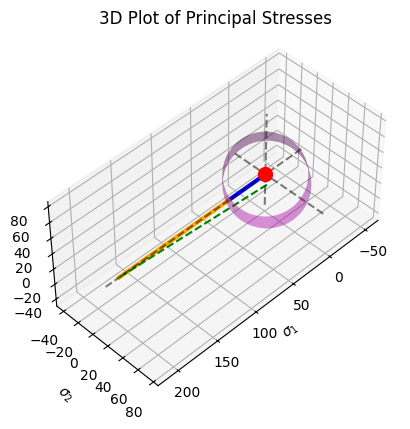

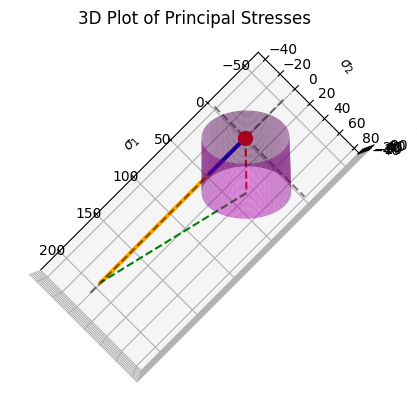

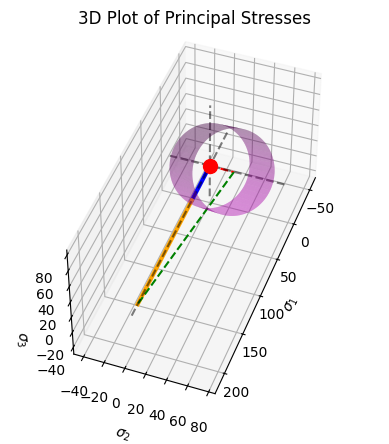

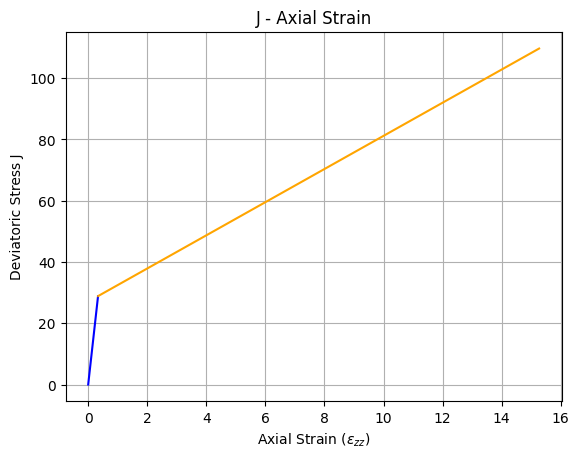

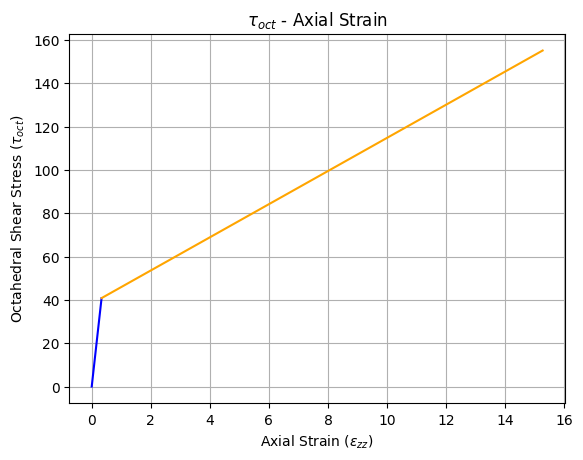

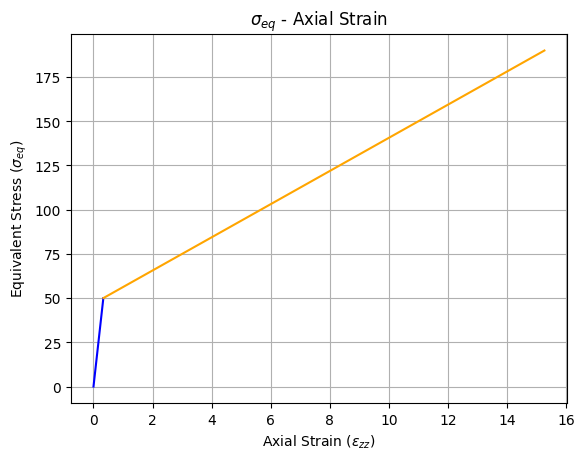

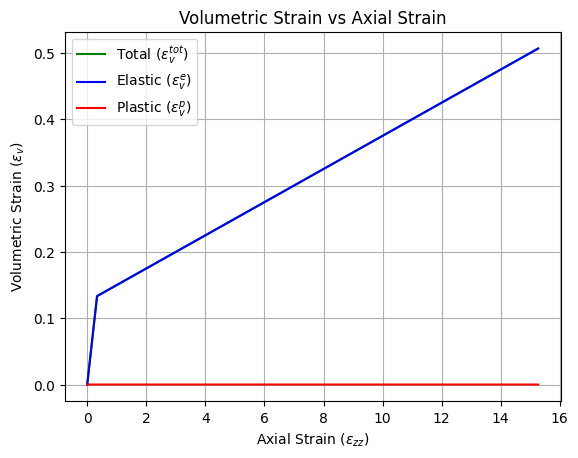

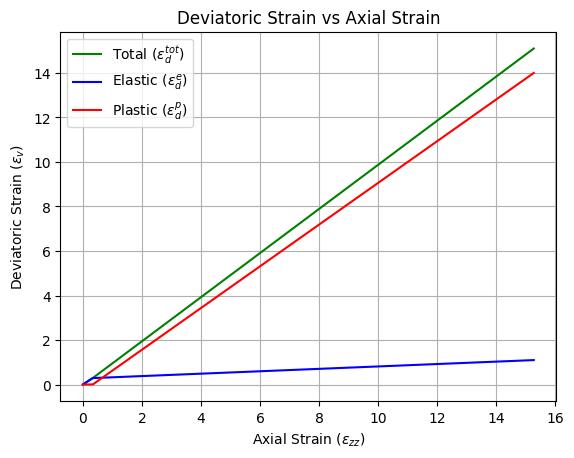

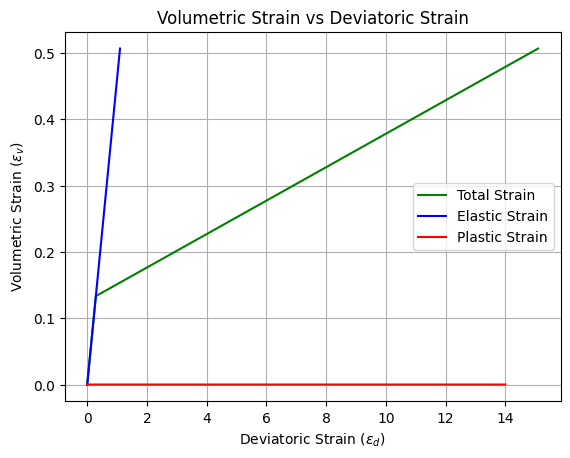

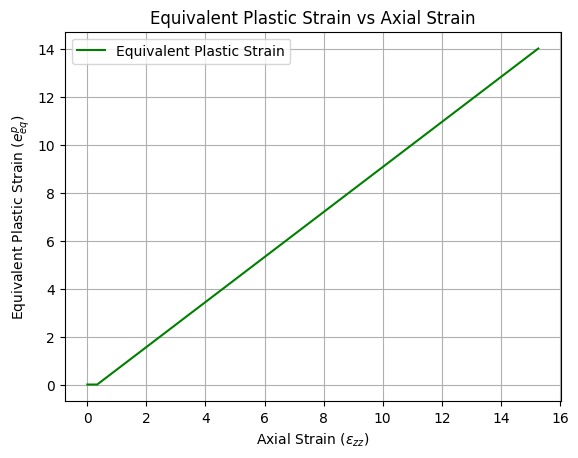

In [15]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

PLOT_DIR = f"/mofem_install/jupyter/thomas/mfront_interface/mtest_plots/{model}"
os.makedirs(PLOT_DIR, exist_ok=True)


# Initialize axes for 3D plotting
def init_axes():
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    return fig, ax

# Plot cylinder along the space diagonal
def plot_cylinder(ax, radius, start_height=0, end_height=100):
    diagonal_direction = np.array([1, 1, 1]) / np.linalg.norm([1, 1, 1])
    height = np.linspace(start_height, end_height, 50)
    angle = np.linspace(0, 2 * np.pi, 100)
    Height, Angle = np.meshgrid(height, angle)

    orthogonal_vector_1 = np.array([1.0, -1.0, 0.0]) / np.linalg.norm([1.0, -1.0, 0.0])
    orthogonal_vector_2 = np.cross(diagonal_direction, orthogonal_vector_1)

    X = (radius * np.cos(Angle) * orthogonal_vector_1[0] +
         radius * np.sin(Angle) * orthogonal_vector_2[0] +
         Height * diagonal_direction[0])
    Y = (radius * np.cos(Angle) * orthogonal_vector_1[1] +
         radius * np.sin(Angle) * orthogonal_vector_2[1] +
         Height * diagonal_direction[1])
    Z = (radius * np.cos(Angle) * orthogonal_vector_1[2] +
         radius * np.sin(Angle) * orthogonal_vector_2[2] +
         Height * diagonal_direction[2])

    ax.plot_surface(X, Y, Z, alpha=0.5, color='m')
    ax.scatter(0, 0, 0, color='r', s=100)

# Plot stress history with classification based on tau_oct
def plot_stress_history(ax, sig_1, sig_2, sig_3, tau_oct, tau_oct_0, save_as: str =None):
    
    mask_elastic = tau_oct < tau_oct_0
    mask_plastic = tau_oct >= tau_oct_0
    if np.any(mask_elastic):
        ax.plot(sig_1[mask_elastic], sig_2[mask_elastic], sig_3[mask_elastic], color='b', label='Elastic', linewidth=5)
    if np.any(mask_plastic):
        ax.plot(sig_1[mask_plastic], sig_2[mask_plastic], sig_3[mask_plastic], color='orange', label='Plastic', linewidth=5)

    vol_stress_value = (sig_1 + sig_2 + sig_3) / 3
    diagonal_direction = np.array([1, 1, 1]) / np.linalg.norm([1, 1, 1])
    vol_stress_x = vol_stress_value * diagonal_direction[0]
    vol_stress_y = vol_stress_value * diagonal_direction[1]
    vol_stress_z = vol_stress_value * diagonal_direction[2]
    ax.plot(vol_stress_x, vol_stress_y, vol_stress_z, color='r', linestyle='--', label='Volumetric Stress')
    ax.plot([vol_stress_x[-1], sig_1[-1]], [vol_stress_y[-1], sig_2[-1]], [vol_stress_z[-1], sig_3[-1]], color='g', linestyle='--', label='Deviatoric Stress')

# Plot metadata like labels and planes
def plot_meta(ax, elev, azim):
    ax.set_xlabel(r'$\sigma_1$')
    ax.set_ylabel(r'$\sigma_2$')
    ax.set_zlabel(r'$\sigma_3$')
    ax.set_title('3D Plot of Principal Stresses')

    ax.plot([0, 0], ax.get_ylim(), [0, 0], color='k', linestyle='--', alpha=0.5)  # y-plane
    ax.plot(ax.get_xlim(), [0, 0], [0, 0], color='k', linestyle='--', alpha=0.5)  # x-plane
    ax.plot([0, 0], [0, 0], ax.get_zlim(), color='k', linestyle='--', alpha=0.5)  # z-plane
    limits = np.array([getattr(ax, f'get_{axis}lim')() for axis in 'xyz'])
    ax.set_box_aspect(np.ptp(limits, axis=1))
    ax.view_init(elev=elev, azim=azim)

# General plotting function for 2D plots
def plot_2d(x, y, xlabel, ylabel, title, color='b', linestyle='-', label=None, plastic_cutoff=None, save_as: str = None):
    plt.figure()
    if plastic_cutoff:
        mask_elastic = y < plastic_cutoff
        mask_plastic = y >= plastic_cutoff
        plt.plot(x[mask_elastic], y[mask_elastic], linestyle=linestyle, color='b', label=label)
        plt.plot(x[mask_plastic], y[mask_plastic], linestyle=linestyle, color='orange', label=label)
    else:
        plt.plot(x, y, linestyle=linestyle, color=color, label=label)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.grid(True)
    if label:
        plt.legend()
    
    if save_as:
        filepath = os.path.join(PLOT_DIR, save_as)
        plt.savefig(filepath)
        return filepath

# Plot functions for specific variables
def plot_stress_field(sig_1, sig_2, sig_3, tau_oct, tau_oct_0, final_p, elev, azim, save_as: str =None):
    fig, ax = init_axes()
    plot_cylinder(ax, radius=tau_oct_0, end_height=final_p)
    plot_stress_history(ax, sig_1, sig_2, sig_3, tau_oct, tau_oct_0)
    plot_meta(ax, elev, azim)
    
    if save_as:
        filepath = os.path.join(PLOT_DIR, save_as)
        plt.savefig(filepath)
        return filepath


def plot_J_vs_axial_strain(J, e_zz, save_as: str =None):
    # J = sqrt(J2)
    # cutoff = sig_y/sqrt(3)
    return plot_2d(e_zz, J, 'Axial Strain ($\epsilon_{zz}$)', 'Deviatoric Stress J', 'J - Axial Strain', plastic_cutoff= sig_y/np.sqrt(3), save_as=save_as)

def plot_tau_vs_e_zz(tau_oct, e_zz, save_as: str =None):
    return plot_2d(e_zz, tau_oct, 'Axial Strain ($\epsilon_{zz}$)', 'Octahedral Shear Stress ($\\tau_{oct}$)', '$\\tau_{oct}$ - Axial Strain', plastic_cutoff= tau_oct_0, save_as=save_as)

def plot_sig_eq_vs_e_zz(sig_eq, e_zz, save_as: str =None):
    return plot_2d(e_zz, sig_eq, 'Axial Strain ($\epsilon_{zz}$)', 'Equivalent Stress ($\sigma_{eq}$)', '$\sigma_{eq}$ - Axial Strain', plastic_cutoff= sig_y,save_as=save_as)

def plot_volumetric_strain_vs_axial_strain(e_zz, e_v=None, e_e_v=None, e_p_v=None, save_as: str =None):
    plt.figure()
    # elastic and total coincide, which means there is zero volumetric plastic strain
    plt.plot(e_zz, e_v, linestyle='-', color='g', label='Total ($\epsilon^{tot}_v$)')
    plt.plot(e_zz, e_e_v, linestyle='-', color='b', label='Elastic ($\epsilon^e_v$)')
    plt.plot(e_zz, e_p_v, linestyle='-', color='r', label='Plastic ($\epsilon^p_v$)')
    plt.xlabel('Axial Strain ($\epsilon_{zz}$)')
    plt.ylabel('Volumetric Strain ($\epsilon_v$)')
    plt.title('Volumetric Strain vs Axial Strain')
    plt.grid(True)
    plt.legend()
    if save_as:
        filepath = os.path.join(PLOT_DIR, save_as)
        plt.savefig(filepath)
        return filepath
    
def plot_deviatoric_strain_vs_axial_strain(e_zz, e_d=None, e_e_d=None, e_p_d=None, save_as: str =None):
    plt.figure()
    # elastic and total coincide, which means there is zero volumetric plastic strain
    plt.plot(e_zz, e_d, linestyle='-', color='g', label='Total ($\epsilon^{tot}_d$)')
    plt.plot(e_zz, e_e_d, linestyle='-', color='b', label='Elastic ($\epsilon^e_d$)')
    plt.plot(e_zz, e_p_d, linestyle='-', color='r', label='Plastic ($\epsilon^p_d$)')
    plt.xlabel('Axial Strain ($\epsilon_{zz}$)')
    plt.ylabel('Deviatoric Strain ($\epsilon_v$)')
    plt.title('Deviatoric Strain vs Axial Strain')
    plt.grid(True)
    plt.legend()
    
    if save_as:
        filepath = os.path.join(PLOT_DIR, save_as)
        plt.savefig(filepath)
        return filepath

def plot_volumetric_strain_vs_deviatoric_strain(e_v, e_d, e_e_d=None, e_e_v=None, e_p_d=None, e_p_v=None, ok=False, save_as: str =None):
    plt.figure()
    plt.plot(e_d, e_v, linestyle='-', color='g', label='Total Strain')
    if e_e_d is not None and e_e_v is not None:
        plt.plot(e_e_d, e_e_v, linestyle='-', color='b', label='Elastic Strain')
    if e_p_d is not None and e_p_v is not None:
        plt.plot(e_p_d, e_p_v, linestyle='-', color='r', label='Plastic Strain')
    plt.xlabel('Deviatoric Strain ($\epsilon_d$)')
    plt.ylabel('Volumetric Strain ($\epsilon_v$)')
    plt.title('Volumetric Strain vs Deviatoric Strain')
    plt.grid(True)
    plt.legend()
    
    if save_as:
        filepath = os.path.join(PLOT_DIR, save_as)
        plt.savefig(filepath)
        return filepath

def plot_e_p_eq_vs_e_zz(e_p_eq, e_zz, e_p_eq_calc=None, ok=False, save_as: str =None):
    plt.figure()
    plt.plot(e_zz, e_p_eq, linestyle='-', color='g', label='Equivalent Plastic Strain')
    if ok and e_p_eq_calc is not None:
        plt.plot(e_zz, e_p_eq_calc, linestyle='-', color='b', label='Calculated Plastic Strain')
    plt.xlabel('Axial Strain ($\epsilon_{zz}$)')
    plt.ylabel('Equivalent Plastic Strain ($e^p_{eq}$)')
    plt.title('Equivalent Plastic Strain vs Axial Strain')
    plt.grid(True)
    plt.legend()
    
    if save_as:
        filepath = os.path.join(PLOT_DIR, save_as)
        plt.savefig(filepath)
        return filepath

image_files = []
image_files.append(plot_stress_field(sig_1, sig_2, sig_3, tau_oct, tau_oct_0, p[-1],elev=45,azim=45,save_as="1_stress_field.png"))
image_files.append(plot_stress_field(sig_1, sig_2, sig_3, tau_oct, tau_oct_0, p[-1],elev=90,azim=45,save_as="1_stress_field_alt.png"))
image_files.append(plot_stress_field(sig_1, sig_2, sig_3, tau_oct, tau_oct_0, p[-1],elev=45,azim=20,save_as="1_stress_field_alt2.png"))
image_files.append(plot_J_vs_axial_strain(J, e_zz,save_as="2_J_ezz.png"))
image_files.append(plot_tau_vs_e_zz(tau_oct, e_zz,save_as="3_tau_ezz.png"))
image_files.append(plot_sig_eq_vs_e_zz(sig_eq, e_zz,save_as="4_sigeq_ezz.png"))
image_files.append(plot_volumetric_strain_vs_axial_strain(e_zz=e_zz, e_v=e_v, e_e_v=e_e_v, e_p_v=e_p_v,save_as="5_ev_ezz.png"))
image_files.append(plot_deviatoric_strain_vs_axial_strain(e_zz=e_zz, e_d=e_d, e_e_d=e_e_d, e_p_d=e_p_d,save_as="6_ed_ezz.png"))
image_files.append(plot_volumetric_strain_vs_deviatoric_strain(e_v=e_v, e_d=e_d, e_e_v=e_e_v, e_e_d=e_e_d, e_p_v=e_p_v, e_p_d=e_p_d,save_as="7_ev_ed.png"))
image_files.append(plot_e_p_eq_vs_e_zz(e_p_eq, e_zz,save_as="8_epeq_ezz.png"))



In [16]:
from IPython.display import display, HTML

# Time-related images with a common title
display(HTML('<h3 style="text-align:left">VON MISES</h3>'))


images_html = ''.join([
    f'<img src="{img}" style="display:inline;margin:1px" width="500"/>'
    for img in image_files
])
display(HTML(images_html))
